# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

In [1]:
import os
os.chdir("../..")
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
controller = pints.NestedController(log_likelihood, log_prior,
                                    method=pints.NestedEllipsoidSampler)

# Set number of iterations
controller.set_iterations(8000)

# Set the number of posterior samples to generate
controller.set_n_posterior_samples(1600)

# Do proposals in parallel
controller.set_parallel(True)

# Use dynamic enlargement factor
controller.sampler().set_dynamic_enlargement_factor(1)

Run the sampler!

In [3]:
samples = controller.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.1 -inf          1             
0     2       0:00.1 -inf          1             
0     21      0:00.2 -inf          1             
0     41      0:00.2 -inf          1             
0     61      0:00.2 -inf          1             
0     81      0:00.3 -inf          1             
0     101     0:00.3 -inf          1             
0     121     0:00.3 -inf          1             
0     141     0:00.4 -inf          1             
0     161     0:00.4 -inf          1             
0     181     0:00.4 -inf          1             
0     201     0:00.5 -inf          1             
0     221     0:00.5 -inf          1             
0     241     0:00.5 -inf          1             
0     261     0:00.6 -inf          1             
0     281     0:00.6 -inf          1             
0     301    

3     -23     0:00.3  0            2380          
8008  3      -1:37.5  0.312829     0             
2400  8080    0:03.9 -21.96509658  0.3125        
0     2420  136:16.0  3.938369732 -21.33574769378
0     0      40:40.0  8296         3.978624477   
-20   0       0:00.0  2460         8488          
4     -20     0:00.3  0            2480          
8632  4      -1:40.3  0.301263     0             
2500  8800    0:04.1 -19.22063514  0.297619047619
0     2520  146:40.0  4.145196337 -18.76364090348
0     0      42:20.0  8848         4.168728316   
-18   0       0:00.0  2560         8872          
4     -17     0:00.3  0            2580          
8896  4      -1:42.6  0.303672     0             
2600  8920    0:04.2 -16.94120606  0.305164319   
0     2620  149:28.0  4.253504144 -16.5093004317 
0     0      44:00.0  8992         4.272059753   
-16   0       0:00.0  2660         9040          
4     -16     0:00.3  0            2680          
9064  4      -1:44.2  0.309326     0             


## Plot posterior samples versus true parameter values (dashed lines)

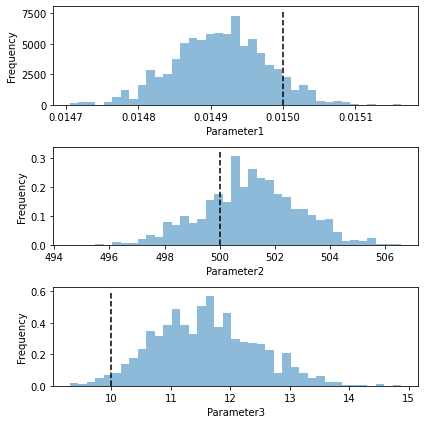

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

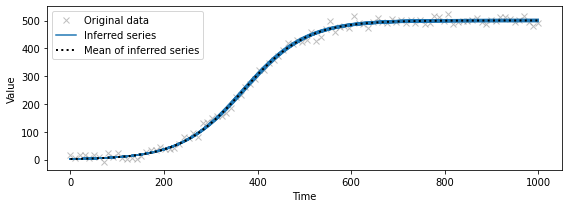

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(controller.marginal_log_likelihood())
      + ' ± ' + str(controller.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -395.11450903761835 ± 0.07710546353202827


## Effective sample size

In [7]:
print('effective sample size = ' + str(controller.effective_sample_size()))

effective sample size = 1630.799077894995
